In [383]:
import numpy as np
import pandas as pd
import pyforest
from sklearn.metrics import r2_score

In [348]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [349]:
data.shape

(500, 9)

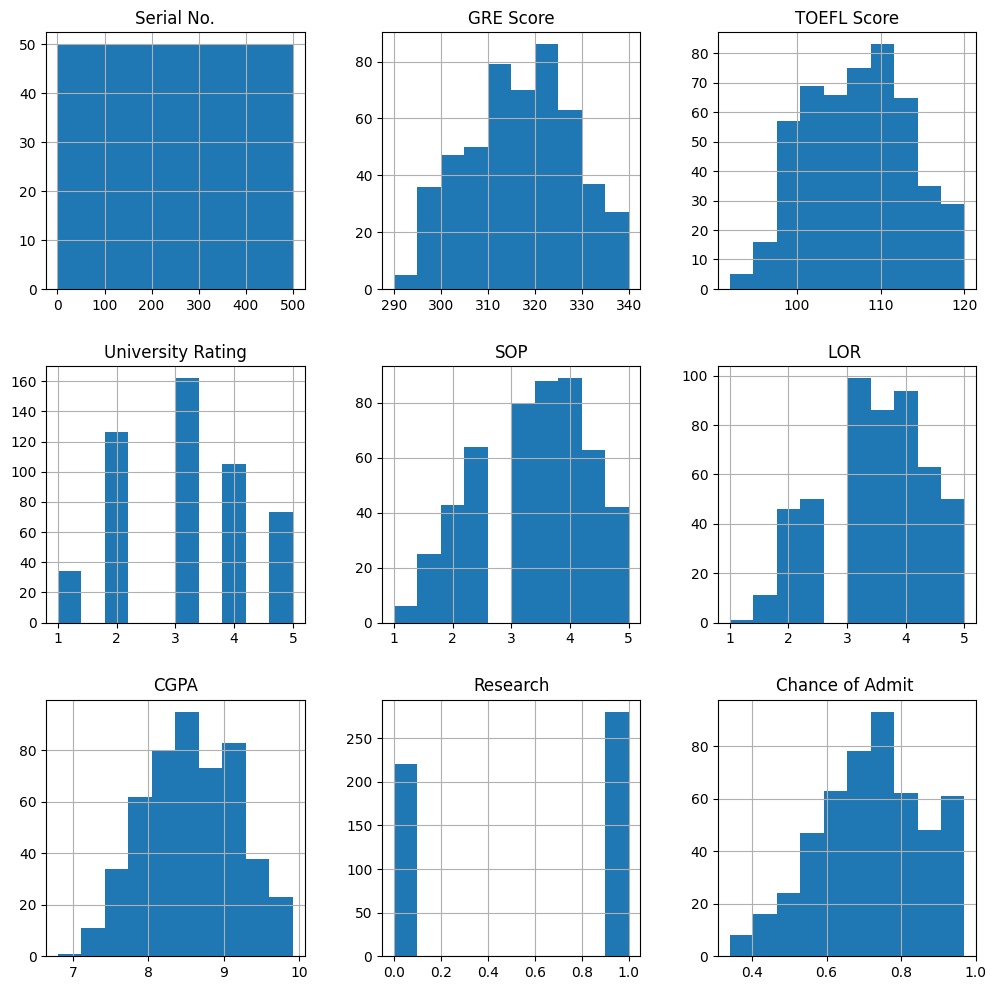

In [350]:
plot = data.hist(figsize=(12,12))

In [351]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [353]:
data.set_index('Serial No.', inplace=True)

In [354]:
data.shape

(500, 8)

In [300]:
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [565]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X = sc.fit_transform(X)

In [566]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

Random Forest Regressor

In [567]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4)

rf.fit(X_train, y_train)

print('Train set score',rf.score(X_train, y_train))
print('Test set score',rf.score(X_test, y_test))

#Displaying Cross-validation scores
scores = cross_val_score(rf, X, y,cv=KFold())
print("CV scores:",scores)
rfScore = scores.mean()
print("Average CV score: {:.3f}".format(rfScore))


Train set score 0.85009256348026
Test set score 0.8051674565601589
CV scores: [0.65837512 0.75029796 0.87013153 0.79577016 0.88029627]
Average CV score: 0.791


Text(0, 0.5, 'accuracy')

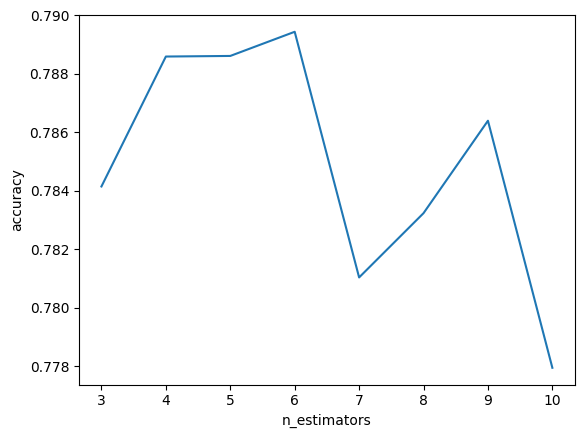

In [568]:
import matplotlib.pyplot as plt
est = [3,4,5,6,7,8,9,10]
scores = []

for n in est:
    rf = RandomForestRegressor(max_depth=n)
    CVscores = cross_val_score(rf, X, y,cv=KFold())
    scores.append(CVscores.mean())

plt.plot(est,scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

Gradient Boosting Regressor

In [569]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=26)

gb.fit(X_train, y_train)

print('Train set score',gb.score(X_train, y_train))
print('Test set score',gb.score(X_test, y_test))

#Displaying Cross-validation scores
scores = cross_val_score(gb, X, y,cv=KFold())
print("CV scores:",scores)
gbScore = scores.mean()
print("Average CV score: {:.3f}".format(gbScore))

Train set score 0.8559526201060643
Test set score 0.8105329488759547
CV scores: [0.65112993 0.75513838 0.86803514 0.79632031 0.87539065]
Average CV score: 0.789


Text(0, 0.5, 'accuracy')

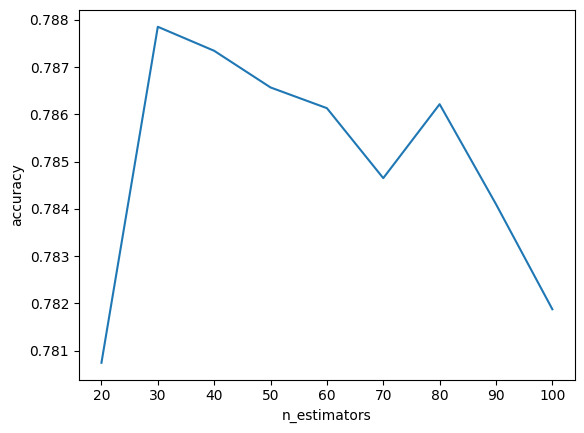

In [570]:
import matplotlib.pyplot as plt
est = [20,30,40,50,60,70,80,90,100]
scores = []

for n in est:
    gb = GradientBoostingRegressor(n_estimators=n)
    CVscores = cross_val_score(gb, X, y,cv=KFold())
    scores.append(CVscores.mean())
    
plt.plot(est,scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

Linear Regression

In [571]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Train set score',lr.score(X_train, y_train))
print('Test set score',lr.score(X_test, y_test))

#Displaying Cross-validation scores
scores = cross_val_score(lr, X, y,cv=KFold())
print("CV scores:",scores)
lrScore = scores.mean()
print("Average CV score: {:.3f}".format(lrScore))

Train set score 0.8122333307902443
Test set score 0.8404989184206357
CV scores: [0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]
Average CV score: 0.811


ANN

In [572]:
import tensorflow as tf
from tensorflow import keras

In [636]:
ANN = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, activation='relu', input_dim=7),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='linear') #regression problem
])

In [637]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [638]:
ANN.compile(loss='mean_squared_error', optimizer='Adam')

hist = ANN.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), validation_split=0.2, callbacks = [early_stopping])

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 1.0672 - val_loss: 0.6534
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3652 - val_loss: 0.2963
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1596 - val_loss: 0.1321
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0733 - val_loss: 0.0594
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0584 - val_loss: 0.0559
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0430 - val_loss: 0.0607
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0354 - val_loss: 0.0562
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.0438
Epoch 9/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.0356
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0308
Epoch 11

Minimum validation loss: 0.004306221380829811


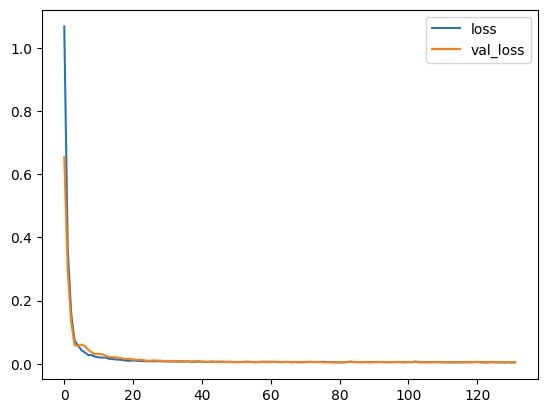

In [639]:
# convert the training history to a dataframe
history_df = pd.DataFrame(hist.history)

# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [640]:
y_pred = ANN.predict(X_test)

r2_score(y_test, y_pred)

4/4 [==============================] - 0s 2ms/step


0.8171370501512853